# Data Munging

In [40]:
# Importing libraries 
import numpy as np 
import pandas as pd
import janitor

# !pip3 install pyjanitor # run this once

import sklearn 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('../data/mushrooms.csv')

In [3]:
data.info() # We want to see the data types and how many null values do we have in the dataset.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.columns # We want to clean column names automatically by replacing each - with _

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data = data.clean_names()

In [6]:
data.columns # Check column names after automatic cleaning

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [7]:
data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# We want to see what different values each column contains
# From here, we can see that the veil_type has one single value and therefore is redundant and not informative so we can proceed with dropping it 
# All the mushrooms in our dataset have partial veils, so the column veil_type is not informative. 
data.columns.tolist()
for col in data.columns.tolist(): 
    print(col,':  ',data[col].unique())

class :   ['p' 'e']
cap_shape :   ['x' 'b' 's' 'f' 'k' 'c']
cap_surface :   ['s' 'y' 'f' 'g']
cap_color :   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises :   ['t' 'f']
odor :   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill_attachment :   ['f' 'a']
gill_spacing :   ['c' 'w']
gill_size :   ['n' 'b']
gill_color :   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk_shape :   ['e' 't']
stalk_root :   ['e' 'c' 'b' 'r' '?']
stalk_surface_above_ring :   ['s' 'f' 'k' 'y']
stalk_surface_below_ring :   ['s' 'f' 'y' 'k']
stalk_color_above_ring :   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk_color_below_ring :   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil_type :   ['p']
veil_color :   ['w' 'n' 'o' 'y']
ring_number :   ['o' 't' 'n']
ring_type :   ['p' 'e' 'l' 'f' 'n']
spore_print_color :   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population :   ['s' 'n' 'a' 'v' 'y' 'c']
habitat :   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
data.drop('veil_type', axis = 1, inplace = True)

In [10]:
# We can see that columns have multiple repetitive values (letters), even though they mean different things in each column. 
# This might cause some problems like duplications when we create dummy variables for these categorical values. 

# We can also see that the column 'stalk_root' has a non-alphanumeric value and it might need some munging. 
# According to the dataset's documentation, the value '?' in stalk_root means that they are missing or unknown stalk root data. 
# Let's see how many of these missing values we have to decide if it'd be okay to drop these rows. 

vals = data['stalk_root'].value_counts().index.values.tolist()

NA_count = data['stalk_root'].value_counts().values

NA_frac = data['stalk_root'].value_counts().to_list()
NA_frac = [i/sum(NA_frac) for i in NA_frac]

pd.DataFrame(zip(NA_count,NA_frac), columns=['Count','Fraction'], index= vals)

# So, now we can see that if we drop the missing values in this column we're losing 30% of our data which accounts for about 2500 instances. 
# Dropping the rows is not the best solution in this case. 
# Therefore, we'll try to impute using KNN.
# Before that, the categorical value must be numerically encoded/labelled from 0 to n. 


# ['population', 'cap_shape', 'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_below_ring']

,Count,Fraction
b,3776,0.464796
?,2480,0.305268
e,1120,0.137863
c,556,0.068439
r,192,0.023634


# DataViz

## Attribute Information:

        1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
        2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
        3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
        4. bruises?: bruises=t,no=f
        5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
        6. gill-attachment: attached=a,descending=d,free=f,notched=n
        7. gill-spacing: close=c,crowded=w,distant=d
        8. gill-size: broad=b,narrow=n
        9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, 
        white=w,yellow=y
        10. stalk-shape: enlarging=e,tapering=t
        11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
        12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
        13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
        14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
        15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
        16. veil-type: partial=p,universal=u
        17. veil-color: brown=n,orange=o,white=w,yellow=y
        18. ring-number: none=n,one=o,two=t
        19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
        20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
        21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
        22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### Descriptive Statistics 

#### Habitat vs class 

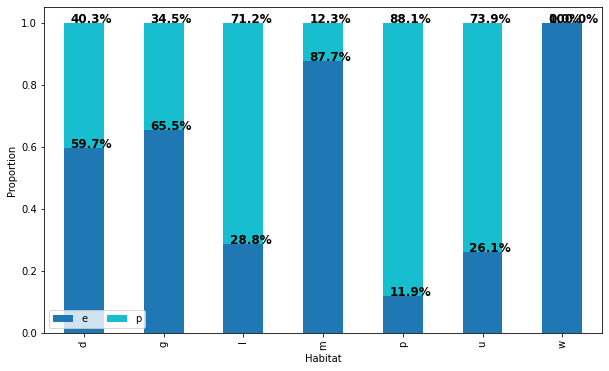

In [33]:
# Habitat vs class

cross_tab_prop = pd.crosstab(index=data['habitat'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Habitat")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

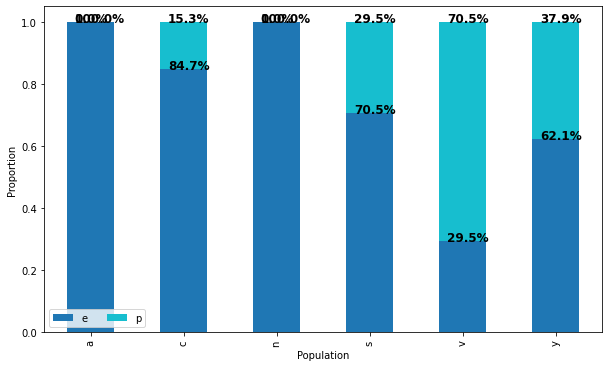

In [34]:
# Population vs class 

cross_tab_prop = pd.crosstab(index=data['population'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Population")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

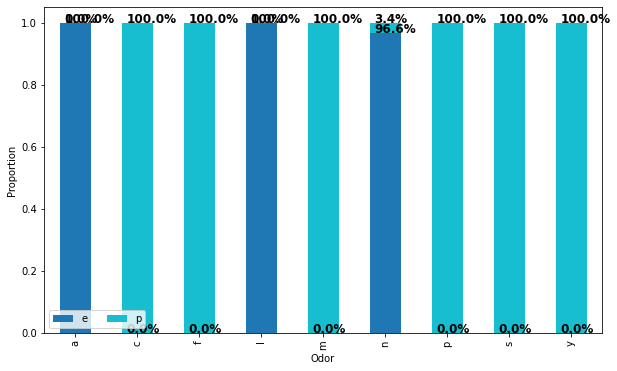

In [35]:
# Odor vs class

cross_tab_prop = pd.crosstab(index=data['odor'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Odor")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

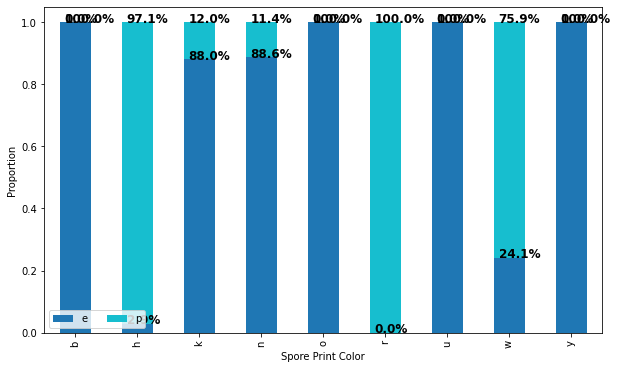

In [36]:
# Spore print color vs class

cross_tab_prop = pd.crosstab(index=data['spore_print_color'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Spore Print Color")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

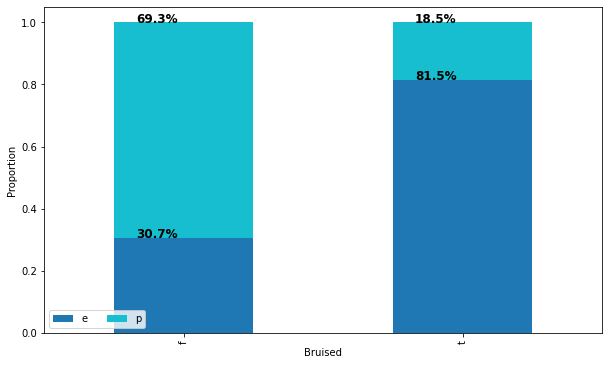

In [39]:
# Bruised vs class

cross_tab_prop = pd.crosstab(index=data['bruises'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Bruised")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

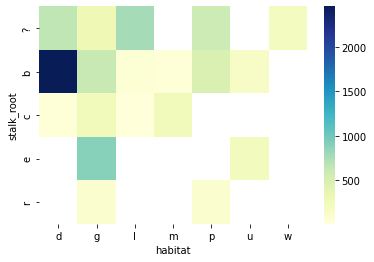

In [56]:
# Stalk root vs habitat

hm = data.groupby(['habitat','stalk_root'], as_index = False)[['class']].count()
hm = hm.pivot('stalk_root', 'habitat', 'class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")


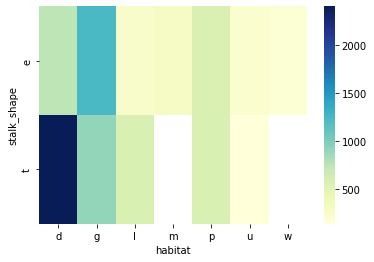

In [55]:
# Stalk shape vs habitat

hm = data.groupby(['habitat','stalk_shape'], as_index = False)[['class']].count()
hm = hm.pivot('stalk_shape','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

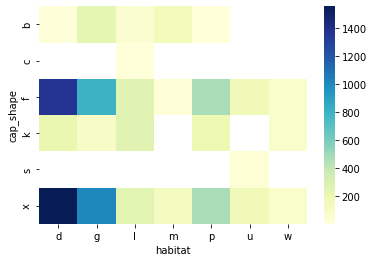

In [57]:
# Cap shape vs habitat 

hm = data.groupby(['habitat','cap_shape'], as_index = False)[['class']].count()
hm = hm.pivot('cap_shape','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

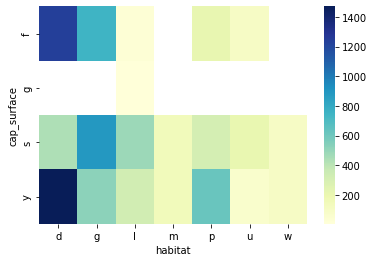

In [58]:
# Cap surface vs habitat 

hm = data.groupby(['habitat','cap_surface'], as_index = False)[['class']].count()
hm = hm.pivot('cap_surface','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

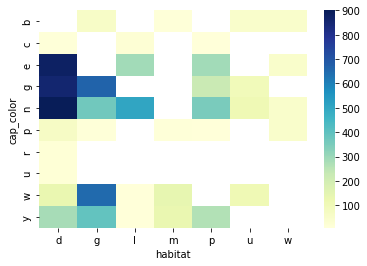

In [59]:
# Cap color vs habitat 

hm = data.groupby(['habitat','cap_color'], as_index = False)[['class']].count()
hm = hm.pivot('cap_color','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

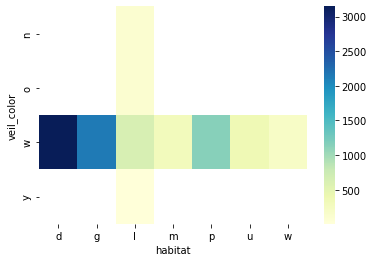

In [60]:
# Veil color vs habitat

hm = data.groupby(['habitat','veil_color'], as_index = False)[['class']].count()
hm = hm.pivot('veil_color','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

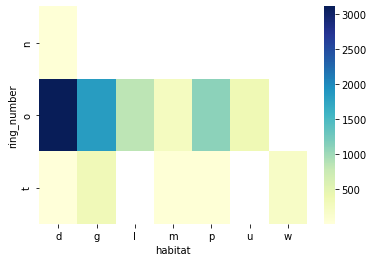

In [61]:
# Ring number vs habitat

hm = data.groupby(['habitat','ring_number'], as_index = False)[['class']].count()
hm = hm.pivot('ring_number','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")